In [3]:
import numpy as np
%matplotlib inline
import astropy

import astropy.units as uu

from pylab import *

In [4]:
uu.mm

Unit("mm")

In [77]:
def field_size_to_fratio(G, field_size):
    """ Converts grasp into a fnumber  """
    
    angle = G/field_size
    
    fratio = 1/np.tan(angle)
    
    return fratio

In [83]:
Dtel = 16*uu.cm
fratio = 6.0
rtoas = 206265*uu.arcsec
scale = Dtel*fratio/rtoas
ffov = 62*uu.arcmin

# instead of area x solid angle I call grasp diameter x angular field of view
G = Dtel * ffov
gunit = uu.mm * uu.degree

field_size = (ffov * scale).to(uu.mm)
print("Field is {0:1.2f} in diameter".format(field_size))
print()

print("I should recover focal ratio of (%s) from conservation laws" % (fratio))
print(" . . .    ", 1/np.tan((G/field_size)))

fs = 50 * uu.mm
fr = field_size_to_fratio(G, fs)
print("For a field of {0:1.1f} the focal ratio is {1:1.1f}".format(fs, fr))
print("At that focal ratio focal length is {0:1.0f}".format(50*uu.mm*fr))



Field is 17.31 mm in diameter

I should recover focal ratio of (6.0) from conservation laws
 . . .     5.944335602341794
For a field of 50.0 mm the focal ratio is 17.3
At that focal ratio focal length is 865 mm


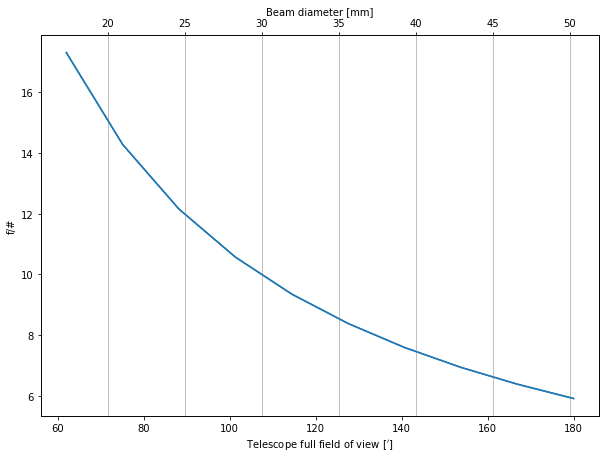

In [125]:
Dtel = 16*uu.cm
fratio = 6.0
rtoas = 206265*uu.arcsec
scale = Dtel*fratio/rtoas
ffov = np.linspace(62,180,10)*uu.arcmin

# instead of area x solid angle I call grasp diameter x angular field of view
G = Dtel * ffov
gunit = uu.mm * uu.degree

field_size = (ffov * scale).to(uu.mm)


fs = 50 * uu.mm
fr = field_size_to_fratio(G, fs)

fig, ax_ang = subplots(figsize=(10,7))
ax_diam = ax_ang.twiny()


ax_ang.plot(ffov,fr)
ax_ang.set_xlabel("Telescope full field of view [$'$]")
ylabel("Focal ratio")
ax_ang.tick_params(axis="x")
ax_ang.set_ylabel('f/#')

#title("f/# given $D_{tel} \cdot Field size$")

ax_diam.plot(field_size, fr)
ax_diam.tick_params(axis="x")
ax_diam.set_xlabel("Beam diameter [mm]")
grid(True)
